In [4]:
import torch
import matplotlib.pyplot as plt

In [5]:
class MSELossWithMask:
    def calculate(self, inputs, targets):
        # Create a mask: 1 for non-zero targets, 0 for zero targets
        mask = (targets != 0).float()
        
        # Calculate squared error
        squared_error = (inputs - targets)**2
        
        # Apply mask to squared error
        masked_error = mask * squared_error
        
        # Calculate average loss (avoiding division by zero)
        total_error = masked_error.sum()
        number_of_non_zero_targets = mask.sum().clamp(min=1)
        average_loss = total_error / number_of_non_zero_targets
        
        return average_loss

In [6]:
def visualize(inputs, targets, loss):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    
    ax1.imshow(inputs, cmap='Blues')
    ax1.set_title('Inputs')
    
    ax2.imshow(targets, cmap='Blues')
    ax2.set_title('Targets')
    
    mask = (targets != 0).float()
    masked_error = mask * (inputs - targets)**2
    ax3.imshow(masked_error, cmap='Reds')
    ax3.set_title(f'Masked Squared Error\nLoss: {loss:.4f}')
    
    plt.tight_layout()
    plt.show()

Inputs:
tensor([[1., 2., 3.],
        [4., 5., 6.]])

Targets:
tensor([[0.0000, 2.0000, 3.5000],
        [4.0000, 0.0000, 5.5000]])

Calculated Loss: 0.1250


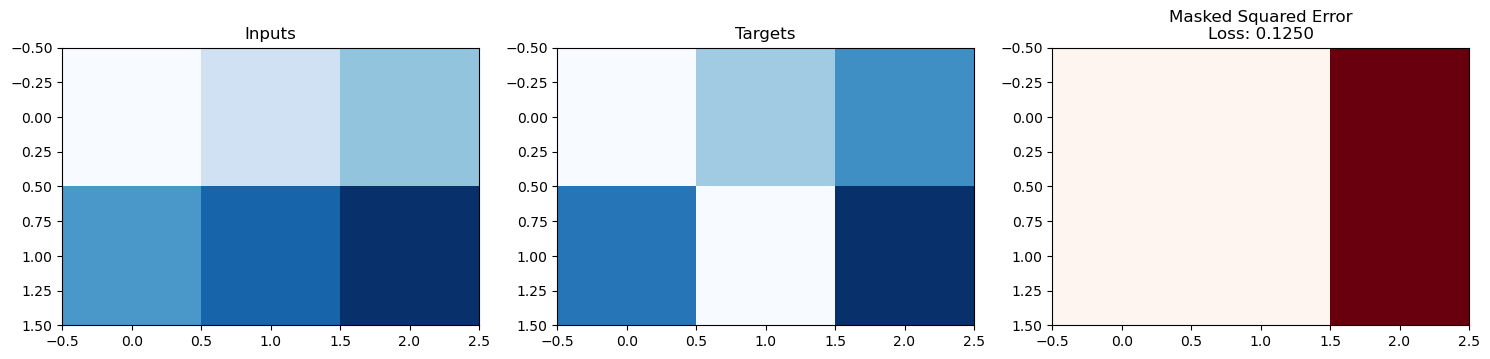

In [7]:
# Example usage
inputs = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
targets = torch.tensor([[0.0, 2.0, 3.5], [4.0, 0.0, 5.5]])

loss_fn = MSELossWithMask()
loss = loss_fn.calculate(inputs, targets)

print(f"Inputs:\n{inputs}")
print(f"\nTargets:\n{targets}")
print(f"\nCalculated Loss: {loss.item():.4f}")

visualize(inputs, targets, loss)

In [3]:
import unittest
import torch
import torch.nn as nn

class MSELossWithMask(nn.Module):
    def __init__(self):
        super(MSELossWithMask, self).__init__()

    def forward(self, inputs: torch.Tensor, targets: torch.Tensor) -> torch.Tensor:
        mask = (targets != 0).float()
        number_ratings = torch.clamp(mask.sum(), min=1.0)
        squared_error = (targets - inputs).pow(2)
        masked_error = (mask * squared_error).sum()
        loss = masked_error / number_ratings
        return loss

class TestMSELossWithMask(unittest.TestCase):
    def setUp(self):
        self.loss_fn = MSELossWithMask()

    def test_zero_loss(self):
        inputs = torch.tensor([[1.0, 2.0, 3.0]])
        targets = torch.tensor([[1.0, 2.0, 3.0]])
        loss = self.loss_fn(inputs, targets)
        self.assertAlmostEqual(loss.item(), 0.0, places=6)

    def test_nonzero_loss(self):
        inputs = torch.tensor([[1.0, 2.0, 3.0]])
        targets = torch.tensor([[2.0, 3.0, 4.0]])
        loss = self.loss_fn(inputs, targets)
        self.assertGreater(loss.item(), 0.0)

    def test_mask_functionality(self):
        inputs = torch.tensor([[1.0, 2.0, 3.0]])
        targets = torch.tensor([[0.0, 2.0, 3.0]])
        loss = self.loss_fn(inputs, targets)
        expected_loss = ((2.0 - 2.0)**2 + (3.0 - 3.0)**2) / 2
        self.assertAlmostEqual(loss.item(), expected_loss, places=6)

    def test_all_zeros_target(self):
        inputs = torch.tensor([[1.0, 2.0, 3.0]])
        targets = torch.tensor([[0.0, 0.0, 0.0]])
        loss = self.loss_fn(inputs, targets)
        self.assertAlmostEqual(loss.item(), 0.0, places=6)

    def test_multi_dimensional_input(self):
        inputs = torch.tensor([[[1.0, 2.0], [3.0, 4.0]]])
        targets = torch.tensor([[[1.0, 0.0], [0.0, 4.0]]])
        loss = self.loss_fn(inputs, targets)
        expected_loss = ((1.0 - 1.0)**2 + (4.0 - 4.0)**2) / 2
        self.assertAlmostEqual(loss.item(), expected_loss, places=6)

    def test_large_input(self):
        inputs = torch.rand(100, 100)
        targets = torch.rand(100, 100)
        loss = self.loss_fn(inputs, targets)
        self.assertIsInstance(loss.item(), float)

# Function to run all tests
def run_tests():
    suite = unittest.TestLoader().loadTestsFromTestCase(TestMSELossWithMask)
    runner = unittest.TextTestRunner(verbosity=2)
    runner.run(suite)

# Run this cell to execute the tests
run_tests()

test_all_zeros_target (__main__.TestMSELossWithMask.test_all_zeros_target) ... ok
test_large_input (__main__.TestMSELossWithMask.test_large_input) ... ok
test_mask_functionality (__main__.TestMSELossWithMask.test_mask_functionality) ... ok
test_multi_dimensional_input (__main__.TestMSELossWithMask.test_multi_dimensional_input) ... ok
test_nonzero_loss (__main__.TestMSELossWithMask.test_nonzero_loss) ... ok
test_zero_loss (__main__.TestMSELossWithMask.test_zero_loss) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.016s

OK
